In [1]:
# Colab
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [2]:
# jupyter 맷플롯립 한글 폰트 지정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats, display
from cycler import cycler

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Unknown system... sorry~~~~


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


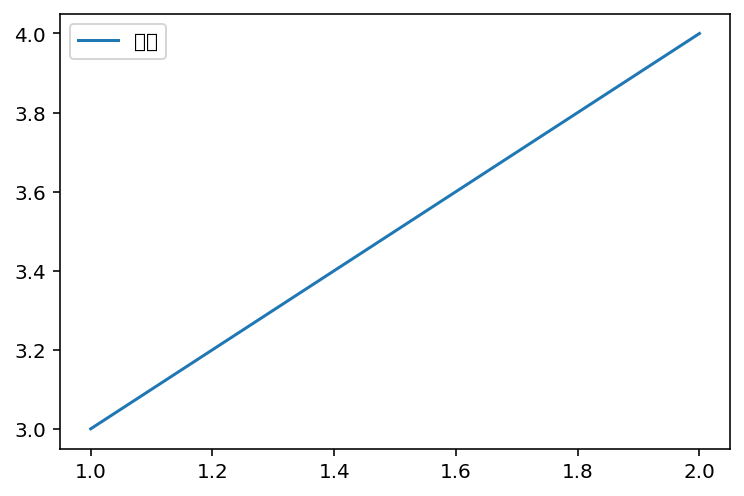

In [3]:
plt.plot([1,2], [3,4], label='임시')
plt.legend()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import os

In [6]:
os.listdir()

['.config', 'sample_data']

In [7]:
from google.colab import files
uploaded = files.upload()


Saving califonia.png to califonia.png
Saving housing.csv to housing.csv


In [8]:
uploaded

Output hidden; open in https://colab.research.google.com to view.

In [9]:
os.listdir()

['.config', 'califonia.png', 'housing.csv', 'sample_data']

## CSV 파일 읽기

In [10]:
df = pd.read_csv(
    './housing.csv', 
    sep=','
    )
housing = df

In [11]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 1. 문제정의
- 우리의 목적은 집 가격을 예측하는 것.
- median_house_value = TARGET_VALUE
---
- target_value (y) = median_house_value
- features (X) = long, lat, housing_age, rooms, bedrooms, population, households, median_income, ocean_proximity
--- 

[구분]
- Supervised(Regression)
- 오프라인

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effc7f2c0f0>,
      dtype=object)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


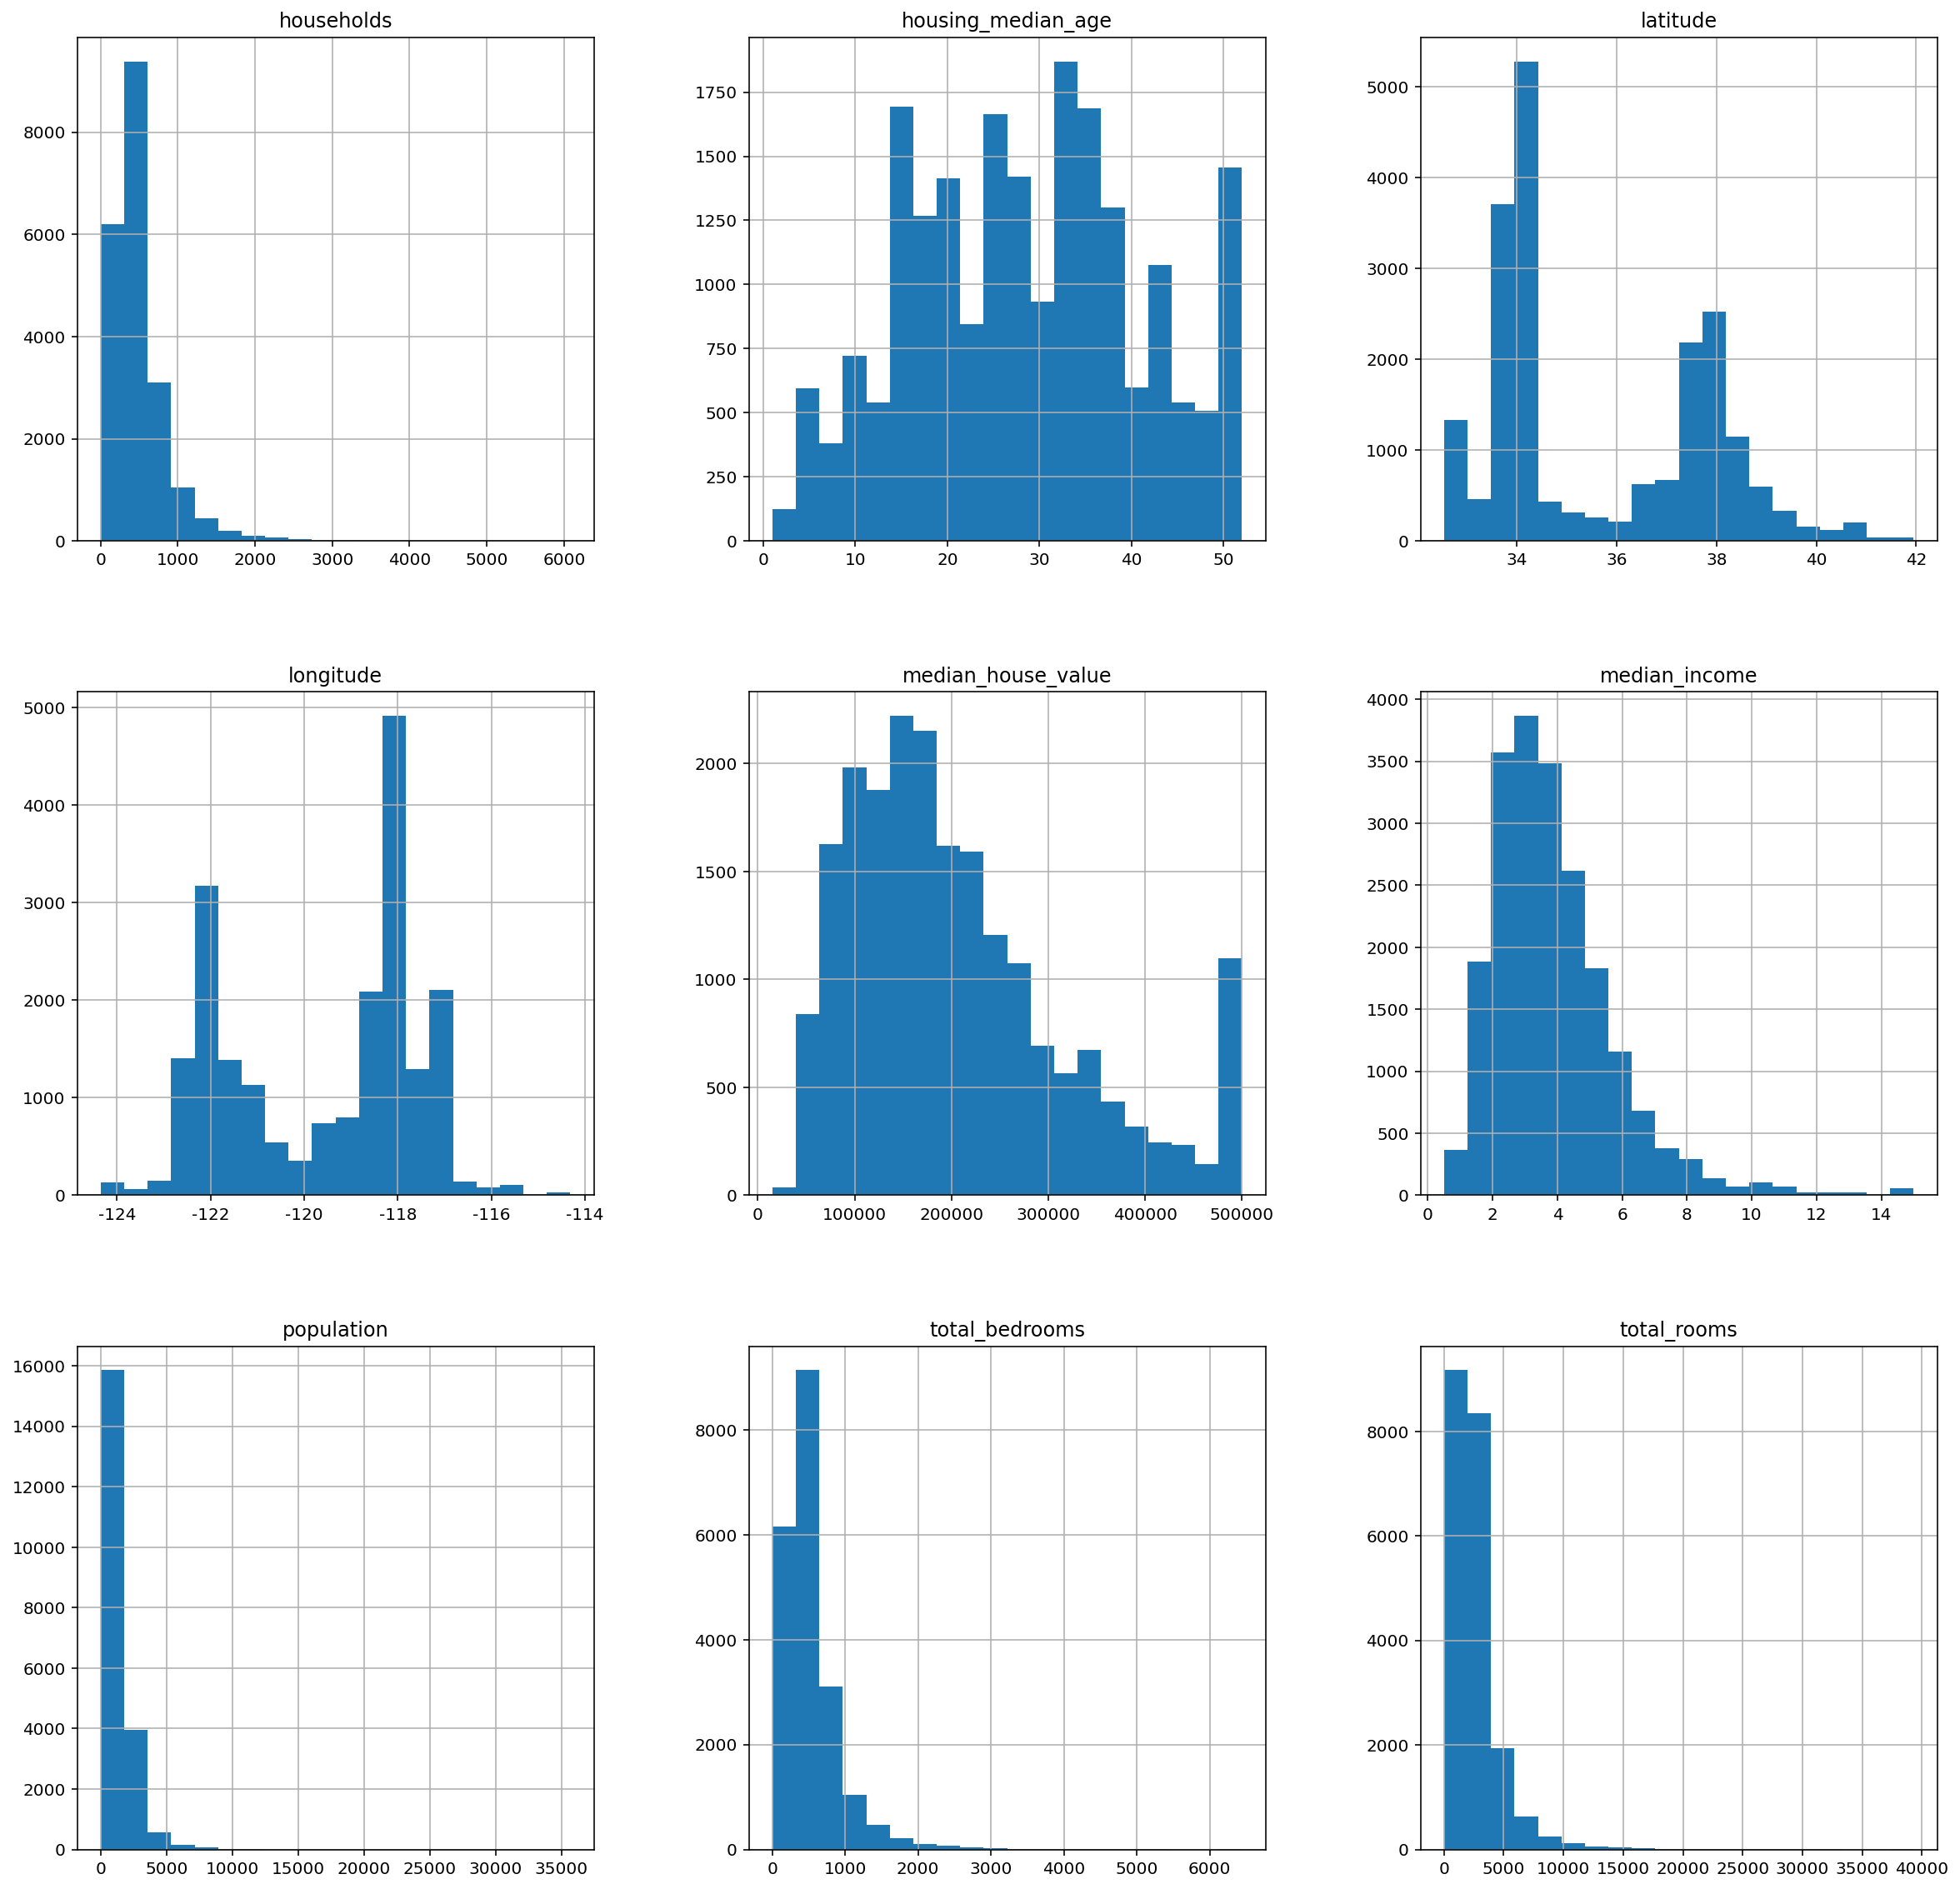

In [14]:
# plt.figure(figsize=(20,20))  colab에선 작동 x
housing.hist(figsize=(20,20), bins=20)

((array([-3.98611384, -3.7703327 , -3.65227474, ...,  3.65227474,
          3.7703327 ,  3.98611384]),
  array([ 14999.,  14999.,  14999., ..., 500001., 500001., 500001.])),
 (110243.23228096718, 206855.8169089148, 0.9551960798030745))

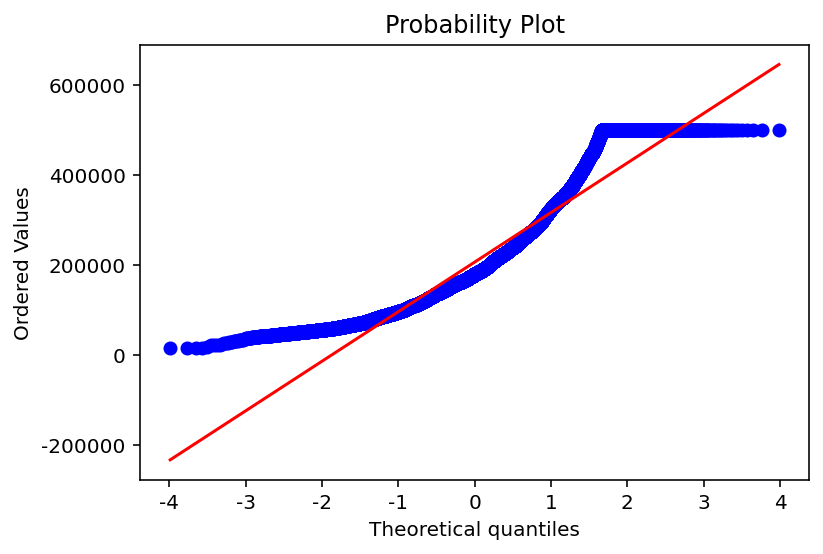

In [15]:
from scipy import stats
stats.probplot(housing['median_house_value'], plot=plt)

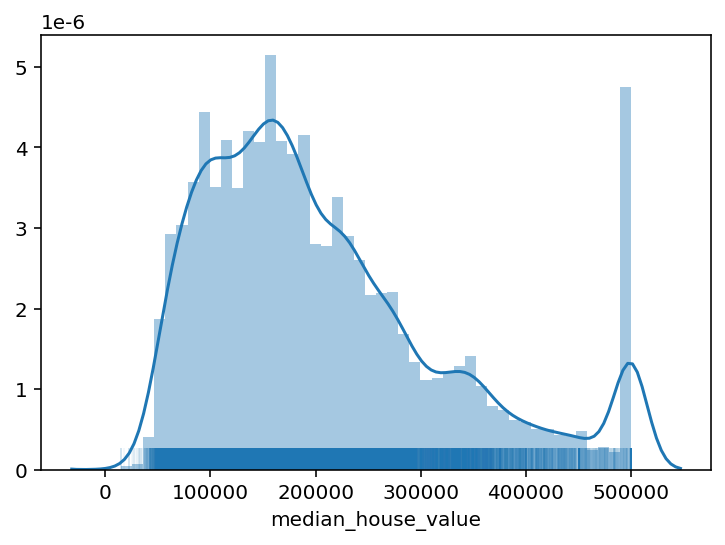

In [16]:
sns.distplot(housing['median_house_value'], rug=True, rug_kws={'alpha': 0.05})

Text(0, 0.5, 'median_house_value')

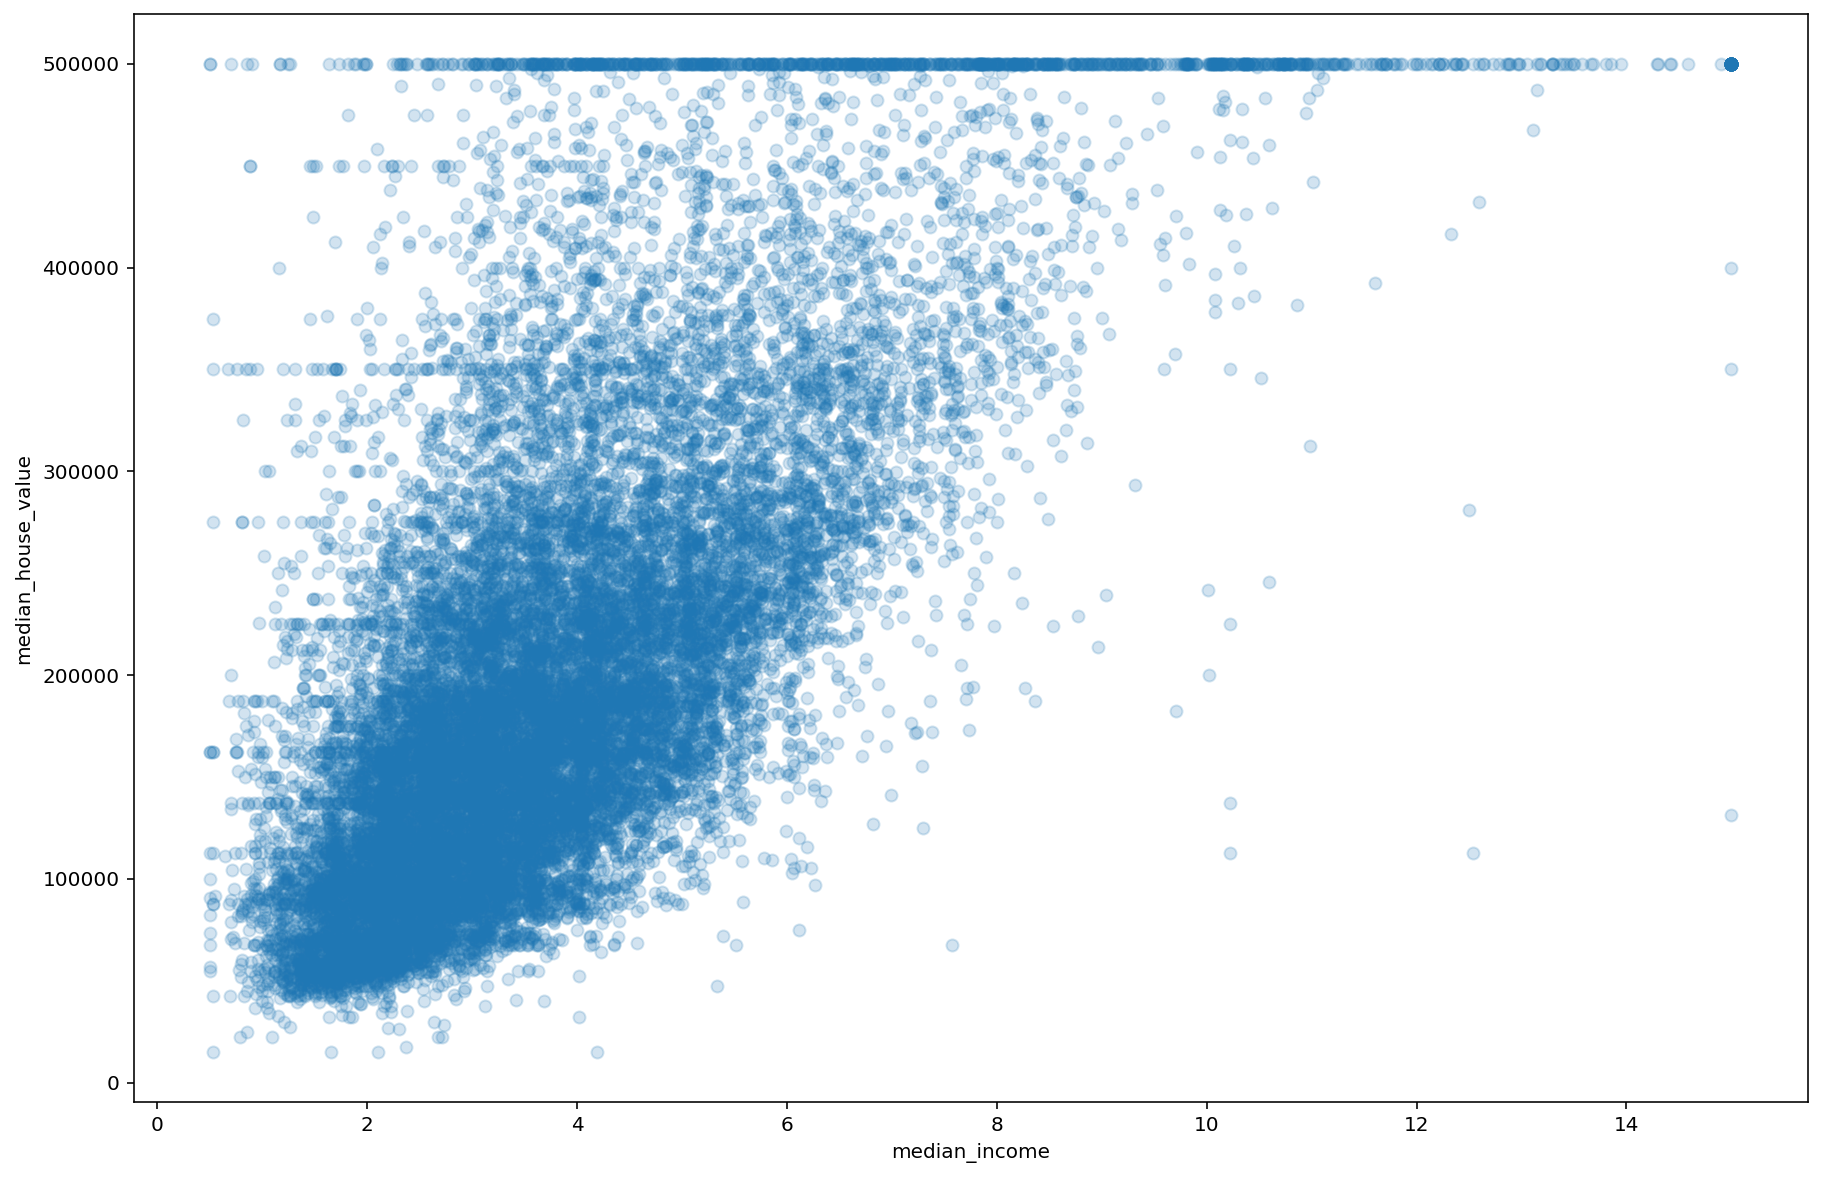

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(housing['median_income'], housing['median_house_value'], alpha=0.2)
plt.xlabel("median_income")
plt.ylabel("median_house_value")

In [18]:
plt.figure(figsize=(20,20))
sns.pairplot(housing, corner=True)

Output hidden; open in https://colab.research.google.com to view.

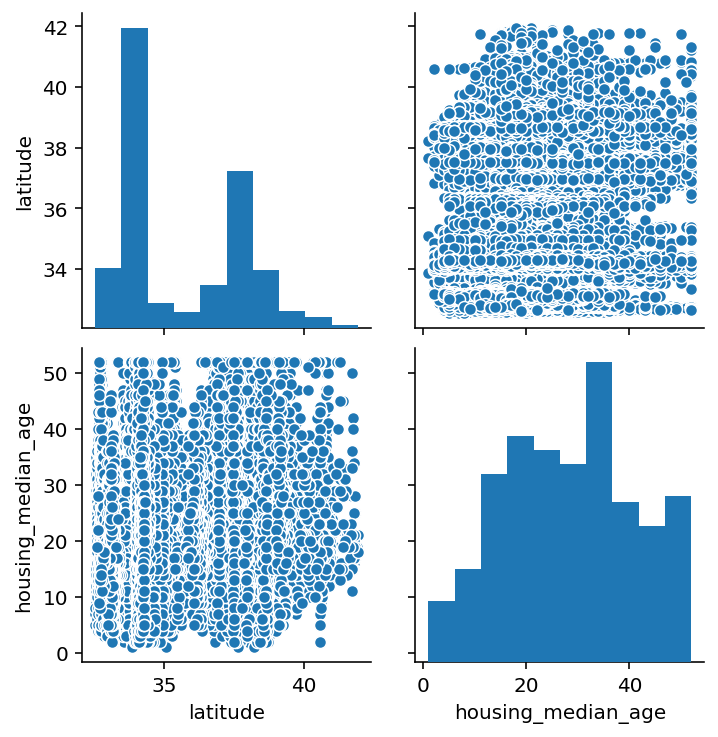

In [19]:
g = sns.pairplot(housing.iloc[:, [1, 2]])

In [20]:
# from sklearn.datasets import load_breast_cancer
# cancer= load_breast_cancer()
# print(cancer.DESCR)

from sklearn.model_selection import train_test_split

In [21]:
train_test_split?

In [22]:
y = housing['median_house_value']
X = housing.drop('median_house_value', axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 9), (5160, 9), (15480,), (5160,))

In [24]:
housing.corr()['median_house_value'].abs()

longitude             0.045967
latitude              0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population            0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

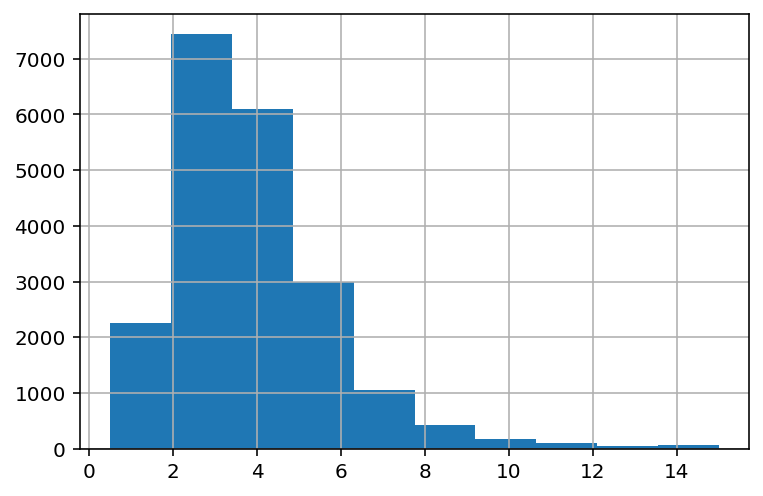

In [25]:
housing['median_income'].hist()

In [26]:
housing['median_income_rank'] = np.ceil(housing['median_income'])
housing['median_income_rank'].value_counts()
housing['median_income_rank'].where(housing['median_income_rank']> 10, 10)

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
20635    10.0
20636    10.0
20637    10.0
20638    10.0
20639    10.0
Name: median_income_rank, Length: 20640, dtype: float64

In [27]:
np.random.seed(3)
np.random.randint(1, 10)

9

### 무작위 샘플링

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8158,-118.12,33.81,37.0,1798.0,331.0,860.0,340.0,4.2143,<1H OCEAN
18368,-121.98,37.16,42.0,2533.0,433.0,957.0,398.0,5.3468,<1H OCEAN
19197,-122.69,38.45,36.0,1943.0,337.0,711.0,318.0,3.9191,<1H OCEAN
3746,-118.41,34.16,32.0,3060.0,505.0,1159.0,510.0,6.3703,<1H OCEAN
13073,-121.33,38.57,17.0,1621.0,350.0,706.0,338.0,2.3684,INLAND
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [29]:
X_train['ocean_proximity'].value_counts(), X_test['ocean_proximity'].value_counts()

(<1H OCEAN     6860
 INLAND        4930
 NEAR OCEAN    1942
 NEAR BAY      1744
 ISLAND           4
 Name: ocean_proximity, dtype: int64, <1H OCEAN     2276
 INLAND        1621
 NEAR OCEAN     716
 NEAR BAY       546
 ISLAND           1
 Name: ocean_proximity, dtype: int64)

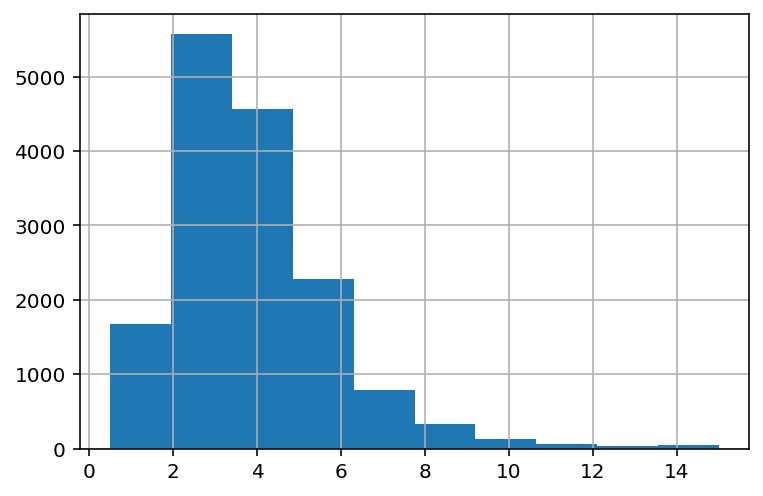

In [30]:
X_train['median_income'].hist()

In [31]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

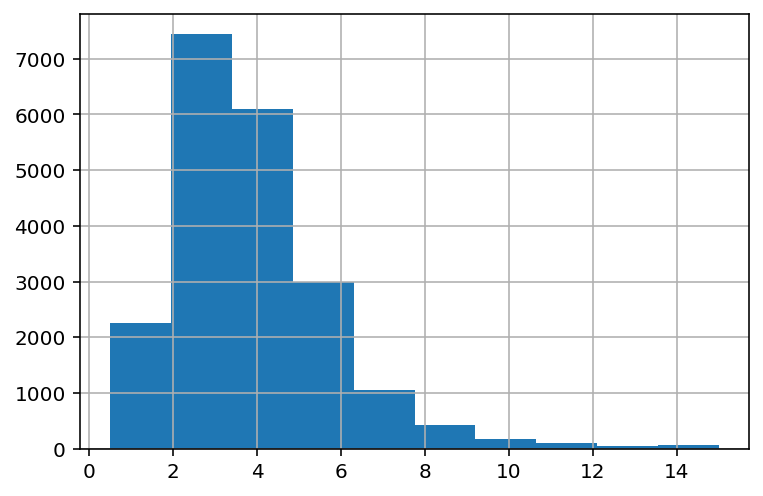

In [32]:
housing['median_income'].hist()

In [33]:
housing['median_income_rank'] = housing['median_income_rank'].where(housing['median_income_rank']<10, 10)
housing['median_income_rank'].value_counts().sort_index()

1.0      159
2.0     2298
3.0     4946
4.0     5150
5.0     3598
6.0     2127
7.0     1163
8.0      509
9.0      283
10.0     407
Name: median_income_rank, dtype: int64

### Stratified Sampling

In [34]:
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=X['median_income_rank']
    )

In [35]:
origin_ratio = (housing['median_income_rank'].value_counts() / len(housing)).sort_index()
origin_ratio

1.0     0.007703
2.0     0.111337
3.0     0.239632
4.0     0.249516
5.0     0.174322
6.0     0.103052
7.0     0.056347
8.0     0.024661
9.0     0.013711
10.0    0.019719
Name: median_income_rank, dtype: float64

In [36]:
train_ratio = (X_train['median_income_rank'].value_counts() / len(X_train)).sort_index()
train_ratio
origin_ratio - train_ratio

1.0     0.000016
2.0    -0.000032
3.0    -0.000032
4.0     0.000032
5.0    -0.000032
6.0     0.000016
7.0     0.000016
8.0    -0.000016
9.0     0.000016
10.0    0.000016
Name: median_income_rank, dtype: float64

In [37]:
X_train['ocean_proximity'].value_counts()

<1H OCEAN     6745
INLAND        4996
NEAR OCEAN    2005
NEAR BAY      1729
ISLAND           5
Name: ocean_proximity, dtype: int64

In [38]:
X_test['ocean_proximity'].value_counts()

<1H OCEAN     2391
INLAND        1555
NEAR OCEAN     653
NEAR BAY       561
Name: ocean_proximity, dtype: int64

In [39]:
# housing = housing.drop('median_income_rank', axis=1)
housing.drop('median_income_rank', axis=1, inplace=True)

In [40]:
housing_origin = housing.copy()

In [41]:
housing_origin.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [42]:
housing = X_train.copy()
housing.shape

(15480, 10)

In [43]:
housing['median_house_value'] = y_train

In [44]:
housing.shape

(15480, 11)

---

In [45]:
# matplotlib 한글 폰트 적용 in Colab # SEARCH
import matplotlib as mpl
import matplotlib.font_manager as fm

!apt-get update --qq
!apt-get install fonts-nanum* --qq
fm.findSystemFonts()

E: Command line option --qq is not understood in combination with the other options
E: Command line option --qq is not understood in combination with the other options


['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/l

In [46]:
housing.drop('median_income_rank', axis=1, inplace=True)

<Figure size 720x720 with 0 Axes>

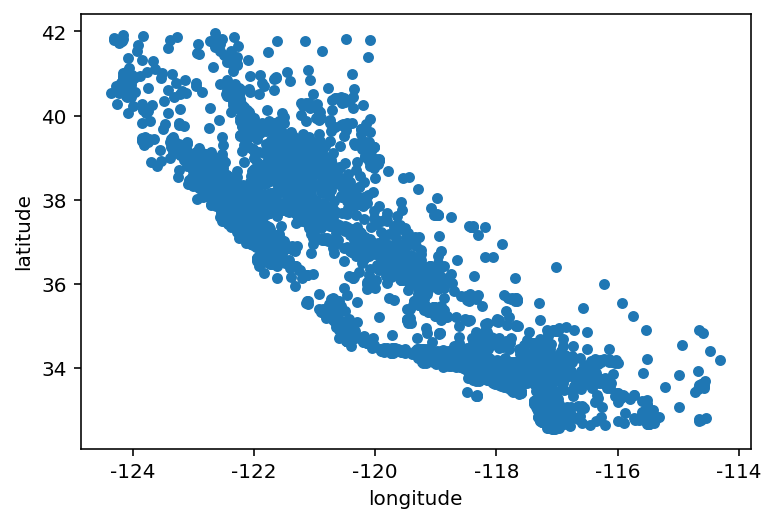

In [47]:
plt.figure(figsize=(10,10))
housing_plot = housing.plot(kind='scatter', x='longitude', y='latitude')
# housing_plot.set_xlabel("경도")
# housing_plot.set_ylabel("위도")

In [48]:
housing = pd.DataFrame(X_train)
housing['median_house_value'] = y_train

<Figure size 1440x1440 with 0 Axes>

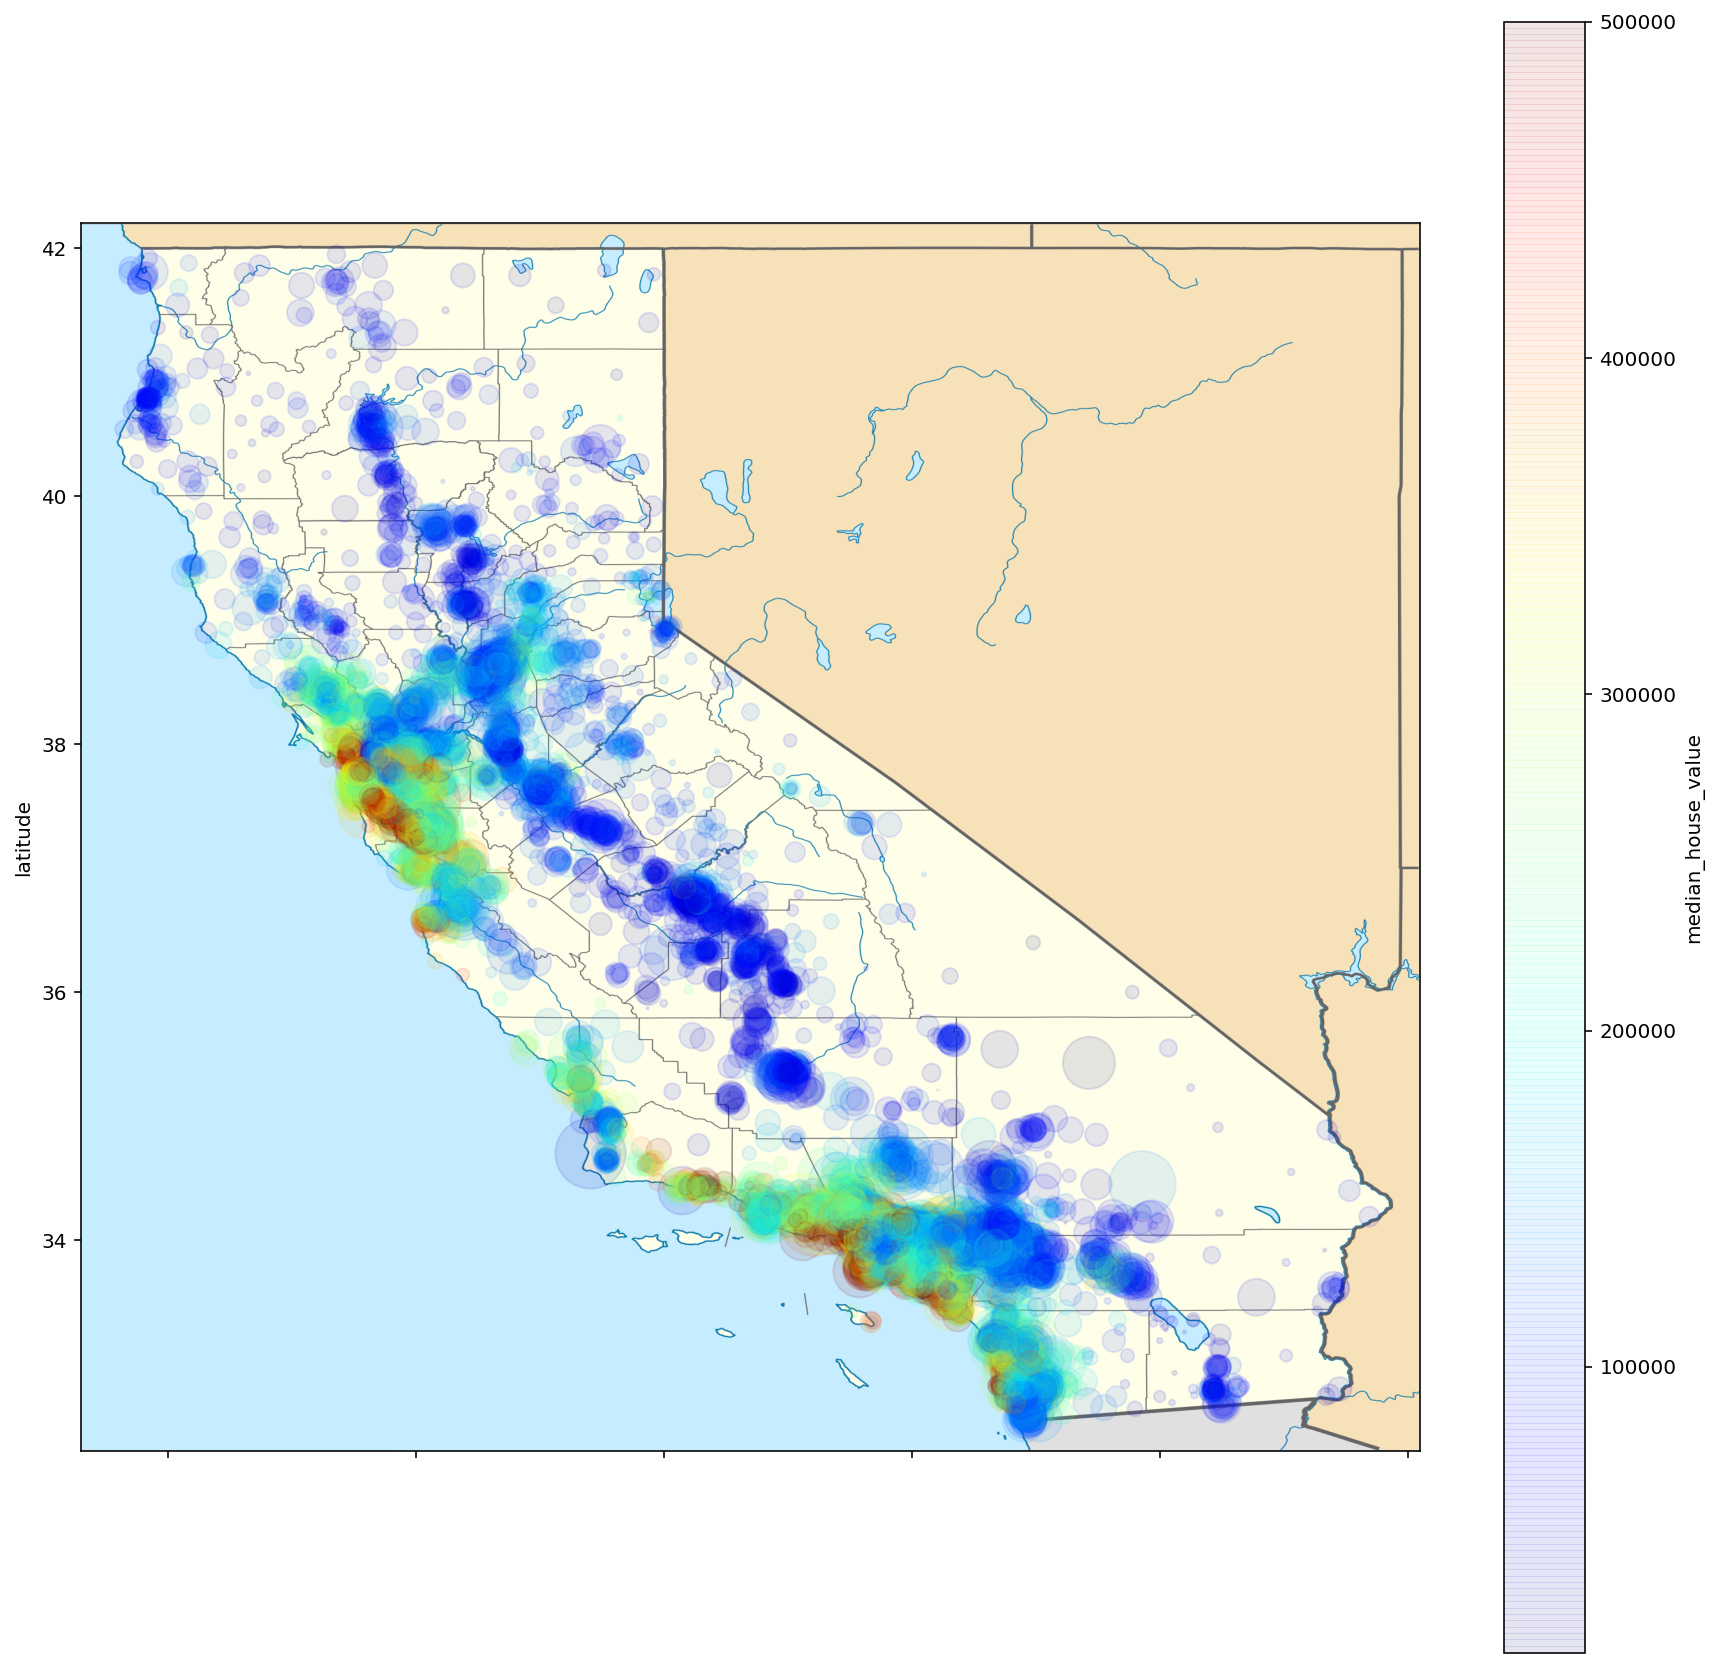

In [49]:
import matplotlib.image as mpimg
plt.figure(figsize=(20,20))

map_img = mpimg.imread('./califonia.png')

housing_plot = housing.plot(kind='scatter', x='longitude', y='latitude', 
                            s=housing['population']/10,
                            c='median_house_value',
                            cmap=plt.get_cmap('jet'), 
                            figsize=(15, 15), alpha=0.1)
plt.imshow(map_img, extent=[-124.7, -113.9, 32.3, 42.2])
plt.show()

In [50]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_income_rank,median_house_value
9902,-122.27,38.28,37.0,1170.0,303.0,766.0,302.0,2.6618,NEAR BAY,3.0,136200.0
10351,-117.68,33.63,16.0,5218.0,1187.0,2701.0,1125.0,3.9290,<1H OCEAN,4.0,143100.0
1600,-122.12,37.89,30.0,3227.0,733.0,1260.0,684.0,4.1250,NEAR BAY,5.0,257100.0
16549,-121.23,37.81,16.0,2085.0,342.0,1236.0,345.0,5.5591,INLAND,6.0,149300.0
4096,-118.41,34.15,24.0,3891.0,866.0,1568.0,830.0,4.1656,<1H OCEAN,5.0,364700.0


In [51]:
housing.drop('median_income_rank', axis=1, inplace=True)

In [52]:
housing.corr()['median_house_value'].sort_values(ascending=False)
# housing.corr('spearman')

median_house_value    1.000000
median_income         0.687593
total_rooms           0.133211
housing_median_age    0.110051
households            0.064321
total_bedrooms        0.048242
population           -0.025526
longitude            -0.041847
latitude             -0.150820
Name: median_house_value, dtype: float64

In [53]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9902,-122.27,38.28,37.0,1170.0,303.0,766.0,302.0,2.6618,NEAR BAY,136200.0
10351,-117.68,33.63,16.0,5218.0,1187.0,2701.0,1125.0,3.9290,<1H OCEAN,143100.0
1600,-122.12,37.89,30.0,3227.0,733.0,1260.0,684.0,4.1250,NEAR BAY,257100.0
16549,-121.23,37.81,16.0,2085.0,342.0,1236.0,345.0,5.5591,INLAND,149300.0
4096,-118.41,34.15,24.0,3891.0,866.0,1568.0,830.0,4.1656,<1H OCEAN,364700.0


### 특성 조합
- 조합하여 더 적절한 feature 만들기

In [54]:
# total_rooms	total_bedrooms	population	households
# 특성조합
housing['total_room_per_household'] = housing['total_rooms'] / housing['households']
housing['bedroom_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
housing['room_per_population'] = housing['total_rooms'] / housing['population']
housing['household_per_population'] = housing['households'] / housing['population']

In [55]:
housing.corr()['median_house_value'].abs().sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687593
household_per_population    0.266241
bedroom_per_rooms           0.253546
room_per_population         0.216939
latitude                    0.150820
total_room_per_household    0.149907
total_rooms                 0.133211
housing_median_age          0.110051
households                  0.064321
total_bedrooms              0.048242
longitude                   0.041847
population                  0.025526
Name: median_house_value, dtype: float64

In [56]:
housing.corr()['median_house_value']

longitude                  -0.041847
latitude                   -0.150820
housing_median_age          0.110051
total_rooms                 0.133211
total_bedrooms              0.048242
population                 -0.025526
households                  0.064321
median_income               0.687593
median_house_value          1.000000
total_room_per_household    0.149907
bedroom_per_rooms          -0.253546
room_per_population         0.216939
household_per_population    0.266241
Name: median_house_value, dtype: float64

In [57]:
housing.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'total_room_per_household',
       'bedroom_per_rooms', 'room_per_population', 'household_per_population'],
      dtype='object')

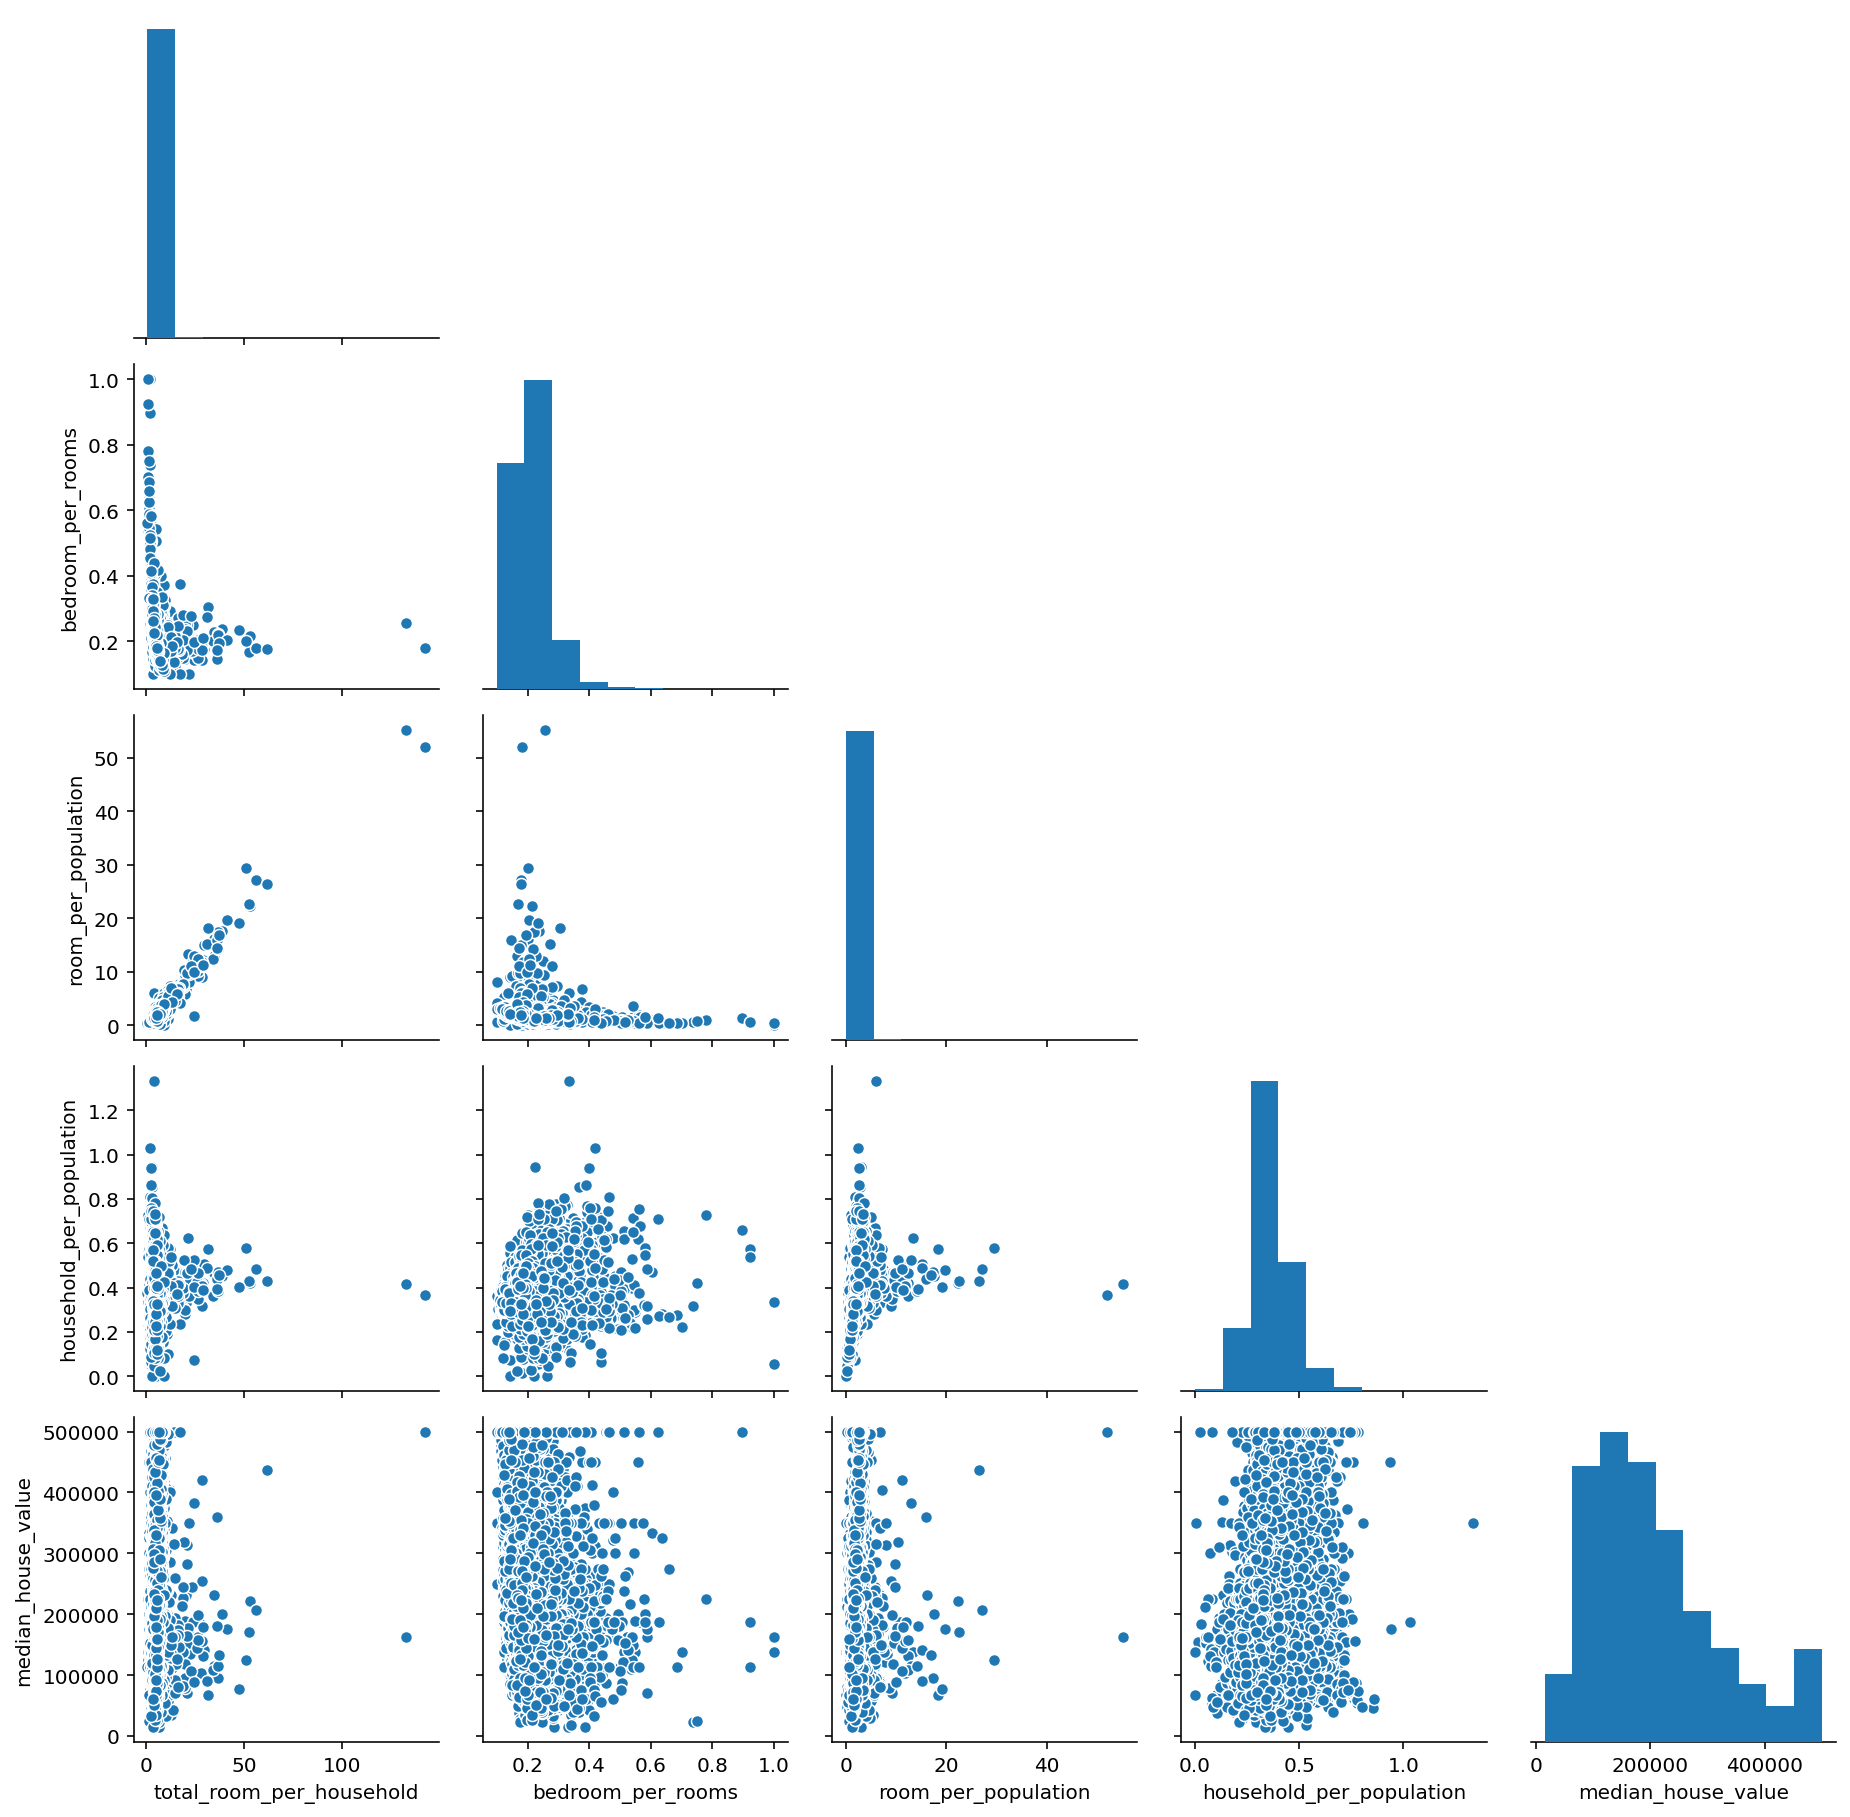

In [58]:
new_cols = ['total_room_per_household', 'bedroom_per_rooms', 
            'room_per_population', 'household_per_population', 'median_house_value']
sns.pairplot(housing[new_cols], corner=True)
# housing['total_room_per_household'] = housing['total_rooms'] / housing['households']
# housing['bedroom_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
# housing['room_per_population'] = housing['total_rooms'] / housing['population']
# housing['household_per_population']

# 전처리 
- 데이터를 머신러닝 알고리즘에 넣기 위해 준비하는 과정

목표:학습을 잘하는 건데
1. 무사히 학습을끝내는 것.
2. 학습을 시킬때 속도가 빨라야 한다.

In [59]:
np.nan

nan

In [60]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 9902 to 20482
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 15480 non-null  float64
 1   latitude                  15480 non-null  float64
 2   housing_median_age        15480 non-null  float64
 3   total_rooms               15480 non-null  float64
 4   total_bedrooms            15334 non-null  float64
 5   population                15480 non-null  float64
 6   households                15480 non-null  float64
 7   median_income             15480 non-null  float64
 8   ocean_proximity           15480 non-null  object 
 9   median_house_value        15480 non-null  float64
 10  total_room_per_household  15480 non-null  float64
 11  bedroom_per_rooms         15334 non-null  float64
 12  room_per_population       15480 non-null  float64
 13  household_per_population  15480 non-null  float64
dtypes: 

In [61]:
# 결측치 존재 열 삭제
housing.dropna(axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 9902 to 20482
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 15480 non-null  float64
 1   latitude                  15480 non-null  float64
 2   housing_median_age        15480 non-null  float64
 3   total_rooms               15480 non-null  float64
 4   population                15480 non-null  float64
 5   households                15480 non-null  float64
 6   median_income             15480 non-null  float64
 7   ocean_proximity           15480 non-null  object 
 8   median_house_value        15480 non-null  float64
 9   total_room_per_household  15480 non-null  float64
 10  room_per_population       15480 non-null  float64
 11  household_per_population  15480 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.2+ MB


In [62]:
# 결측치 행 삭제
housing.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15334 entries, 9902 to 20482
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 15334 non-null  float64
 1   latitude                  15334 non-null  float64
 2   housing_median_age        15334 non-null  float64
 3   total_rooms               15334 non-null  float64
 4   total_bedrooms            15334 non-null  float64
 5   population                15334 non-null  float64
 6   households                15334 non-null  float64
 7   median_income             15334 non-null  float64
 8   ocean_proximity           15334 non-null  object 
 9   median_house_value        15334 non-null  float64
 10  total_room_per_household  15334 non-null  float64
 11  bedroom_per_rooms         15334 non-null  float64
 12  room_per_population       15334 non-null  float64
 13  household_per_population  15334 non-null  float64
dtypes: 

In [63]:
# 대표값으로 대체
# 여기선 median
housing['total_bedrooms'].median()

432.0

In [64]:
housing['total_bedrooms'].fillna(
    housing['total_bedrooms'].median()
    )

9902      303.0
10351    1187.0
1600      733.0
16549     342.0
4096      866.0
          ...  
19260     496.0
18894     564.0
20363     419.0
9723      268.0
20482     478.0
Name: total_bedrooms, Length: 15480, dtype: float64

In [65]:
np.arange(27).reshape(3,3,3)

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [66]:
np.median(np.arange(27).reshape(3,3,3), axis=1)

array([[ 3.,  4.,  5.],
       [12., 13., 14.],
       [21., 22., 23.]])

In [67]:
housing.values.shape

(15480, 14)

In [68]:
# housing median value 
median_values = housing.median(axis=0)
median_values.shape
median_values

longitude                     -118.540000
latitude                        34.270000
housing_median_age              29.000000
total_rooms                   2119.000000
total_bedrooms                 432.000000
population                    1158.000000
households                     407.000000
median_income                    3.543550
median_house_value          179100.000000
total_room_per_household         5.235770
bedroom_per_rooms                0.203170
room_per_population              1.942638
household_per_population         0.355453
dtype: float64

In [69]:
numeric_columns = housing.drop('ocean_proximity', axis=1).columns
numeric_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'total_room_per_household', 'bedroom_per_rooms',
       'room_per_population', 'household_per_population'],
      dtype='object')

In [70]:
housing.loc[:, numeric_columns]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_room_per_household,bedroom_per_rooms,room_per_population,household_per_population
9902,-122.27,38.28,37.0,1170.0,303.0,766.0,302.0,2.6618,136200.0,3.874172,0.258974,1.527415,0.394256
10351,-117.68,33.63,16.0,5218.0,1187.0,2701.0,1125.0,3.9290,143100.0,4.638222,0.227482,1.931877,0.416512
1600,-122.12,37.89,30.0,3227.0,733.0,1260.0,684.0,4.1250,257100.0,4.717836,0.227146,2.561111,0.542857
16549,-121.23,37.81,16.0,2085.0,342.0,1236.0,345.0,5.5591,149300.0,6.043478,0.164029,1.686893,0.279126
4096,-118.41,34.15,24.0,3891.0,866.0,1568.0,830.0,4.1656,364700.0,4.687952,0.222565,2.481505,0.529337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19260,-122.74,38.45,25.0,2696.0,496.0,1296.0,514.0,4.0798,179200.0,5.245136,0.183976,2.080247,0.396605
18894,-122.24,38.13,37.0,3223.0,564.0,1325.0,539.0,4.0938,126900.0,5.979592,0.174992,2.432453,0.406792
20363,-118.95,34.16,21.0,2953.0,419.0,1397.0,410.0,6.5410,291500.0,7.202439,0.141890,2.113815,0.293486
9723,-121.76,36.83,28.0,1445.0,268.0,1017.0,284.0,3.6693,211000.0,5.088028,0.185467,1.420846,0.279253


In [71]:
# 질문
# 강사님 이미 housing에 X_train을 넣어줬는데 
# train test split하기 전에 결측치 처리해주고 다시 나눠줄까요?

housing.loc[:, numeric_columns].fillna(median_values, )

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_room_per_household,bedroom_per_rooms,room_per_population,household_per_population
9902,-122.27,38.28,37.0,1170.0,303.0,766.0,302.0,2.6618,136200.0,3.874172,0.258974,1.527415,0.394256
10351,-117.68,33.63,16.0,5218.0,1187.0,2701.0,1125.0,3.9290,143100.0,4.638222,0.227482,1.931877,0.416512
1600,-122.12,37.89,30.0,3227.0,733.0,1260.0,684.0,4.1250,257100.0,4.717836,0.227146,2.561111,0.542857
16549,-121.23,37.81,16.0,2085.0,342.0,1236.0,345.0,5.5591,149300.0,6.043478,0.164029,1.686893,0.279126
4096,-118.41,34.15,24.0,3891.0,866.0,1568.0,830.0,4.1656,364700.0,4.687952,0.222565,2.481505,0.529337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19260,-122.74,38.45,25.0,2696.0,496.0,1296.0,514.0,4.0798,179200.0,5.245136,0.183976,2.080247,0.396605
18894,-122.24,38.13,37.0,3223.0,564.0,1325.0,539.0,4.0938,126900.0,5.979592,0.174992,2.432453,0.406792
20363,-118.95,34.16,21.0,2953.0,419.0,1397.0,410.0,6.5410,291500.0,7.202439,0.141890,2.113815,0.293486
9723,-121.76,36.83,28.0,1445.0,268.0,1017.0,284.0,3.6693,211000.0,5.088028,0.185467,1.420846,0.279253


- N/A 값을 채울때, train_Set에 대해서 대표값을 정한다.
- 실제 test_set에 대해서 모델 평가를 할 때, train_set에서 정한 대표값으로 N/A 값을 채운다.
    - 이유: 우리가 학습시킨 ML 모델은 train_Set에 대한 대표값을 기준으로 학습을 시킨 모델이기 때문.
- 같은 이유로 새로운 데이터(실제 예측하고자 하는 값)에 대해서도 기존 train_set에 대한 대표값을 채우고 예측한다.


## sklearn 활용하여 결측치 처리

In [72]:
# https://scikit-learn.org/stable/
from sklearn.impute import SimpleImputer

In [73]:
imputer = SimpleImputer(strategy='median')

In [74]:
median_values.values

array([-1.18540000e+02,  3.42700000e+01,  2.90000000e+01,  2.11900000e+03,
        4.32000000e+02,  1.15800000e+03,  4.07000000e+02,  3.54355000e+00,
        1.79100000e+05,  5.23576994e+00,  2.03169691e-01,  1.94263768e+00,
        3.55453245e-01])

- 대부분의 sklearn 클래스(객체)들은 fit이라는 메소드를 가진다.
    - fit은 파라미터를 만드는 메소드다.
- 변환기에는 transform, Estimator에는 predict라는 메소드가 있다.
    - transform은 fit에서 만든 파라미터를 이용해 기존 데이터를 변형시키는 역할을 한다.
    - predict는 fit에서 만든 파라미터를 이용해 새로운 데이터를 예측하는 역할을 한다.


In [75]:
imputer.fit(housing[numeric_columns])
imputer.statistics_

array([-1.18540000e+02,  3.42700000e+01,  2.90000000e+01,  2.11900000e+03,
        4.32000000e+02,  1.15800000e+03,  4.07000000e+02,  3.54355000e+00,
        1.79100000e+05,  5.23576994e+00,  2.03169691e-01,  1.94263768e+00,
        3.55453245e-01])

In [76]:
pd.DataFrame(imputer.transform(housing[numeric_columns]), columns=numeric_columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 15480 non-null  float64
 1   latitude                  15480 non-null  float64
 2   housing_median_age        15480 non-null  float64
 3   total_rooms               15480 non-null  float64
 4   total_bedrooms            15480 non-null  float64
 5   population                15480 non-null  float64
 6   households                15480 non-null  float64
 7   median_income             15480 non-null  float64
 8   median_house_value        15480 non-null  float64
 9   total_room_per_household  15480 non-null  float64
 10  bedroom_per_rooms         15480 non-null  float64
 11  room_per_population       15480 non-null  float64
 12  household_per_population  15480 non-null  float64
dtypes: float64(13)
memory usage: 1.5 MB


In [77]:
imputer.fit_transform(housing[numeric_columns].values)

array([[-122.27      ,   38.28      ,   37.        , ...,    0.25897436,
           1.52741514,    0.39425587],
       [-117.68      ,   33.63      ,   16.        , ...,    0.22748179,
           1.93187708,    0.4165124 ],
       [-122.12      ,   37.89      ,   30.        , ...,    0.22714596,
           2.56111111,    0.54285714],
       ...,
       [-118.95      ,   34.16      ,   21.        , ...,    0.1418896 ,
           2.11381532,    0.29348604],
       [-121.76      ,   36.83      ,   28.        , ...,    0.18546713,
           1.42084562,    0.2792527 ],
       [-118.72      ,   34.28      ,   17.        , ...,    0.1801055 ,
           1.9066092 ,    0.32399425]])

## 범주형 데이터를 처리하자! (인코딩)


In [78]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     6745
INLAND        4996
NEAR OCEAN    2005
NEAR BAY      1729
ISLAND           5
Name: ocean_proximity, dtype: int64

In [79]:
housing['ocean_proximity'].values.shape

(15480,)

In [80]:
housing[['ocean_proximity']].values.shape

(15480, 1)

In [81]:
arr, idx = housing['ocean_proximity'].factorize()
np.unique(arr)
housing['ocean_proximity_label'] = arr
idx

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

## One Hot Encoding

In [82]:
pd.get_dummies(housing['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9902,0,0,0,1,0
10351,1,0,0,0,0
1600,0,0,0,1,0
16549,0,1,0,0,0
4096,1,0,0,0,0
...,...,...,...,...,...
19260,1,0,0,0,0
18894,0,0,0,1,0
20363,1,0,0,0,0
9723,1,0,0,0,0


## sklearn의 Encoding

### LabelEncoder

In [83]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [84]:
encoder = LabelEncoder()
encoder.fit(housing['ocean_proximity'])

LabelEncoder()

In [85]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [86]:
sample_label = encoder.transform(housing['ocean_proximity'])
sample_label

array([3, 0, 3, ..., 0, 0, 0])

In [87]:
encoder.inverse_transform(sample_label)

array(['NEAR BAY', '<1H OCEAN', 'NEAR BAY', ..., '<1H OCEAN', '<1H OCEAN',
       '<1H OCEAN'], dtype=object)

## One Hot Encoder

In [88]:
onehot = OneHotEncoder()
# onehot.fit(housing['ocean_proximity']) # error
# 가능
onehot.fit(housing[['ocean_proximity']])
onehot.transform(housing[['ocean_proximity']])

<15480x5 sparse matrix of type '<class 'numpy.float64'>'
	with 15480 stored elements in Compressed Sparse Row format>

In [89]:
onehot_encoded = onehot.fit_transform(housing['ocean_proximity'].values.reshape(-1, 1))


In [90]:
onehot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [91]:
onehot_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

#### 부록 reshape


In [92]:
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [93]:
arr.reshape(9, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [94]:
arr.reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [95]:
# 데이터 전처리 (Missing Value, Feature Engineering)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_room_per_household,bedroom_per_rooms,room_per_population,household_per_population,ocean_proximity_label
count,15480.000000,15480.000000,15480.000000,15480.000000,15334.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15334.000000,15480.000000,15480.000000,15480.000000
mean,-119.592174,35.661287,28.684755,2622.461563,534.918873,1413.539083,496.246059,3.870908,206259.116021,5.442675,0.212809,1.981981,0.364531,1.471059
std,2.008460,2.145922,12.595153,2163.788201,416.257526,1092.989687,377.662311,1.891739,115554.739065,2.578256,0.057747,1.135735,0.092710,0.856491
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.888889,0.100000,0.002547,0.000804,0.000000
25%,-121.810000,33.940000,18.000000,1447.750000,295.000000,785.000000,279.000000,2.563850,118375.000000,4.449878,0.175476,1.526699,0.304593,1.000000
50%,-118.540000,34.270000,29.000000,2119.000000,432.000000,1158.000000,407.000000,3.543550,179100.000000,5.235770,0.203170,1.942638,0.355453,1.000000
75%,-118.010000,37.730000,37.000000,3120.000000,642.750000,1711.000000,599.000000,4.748350,263800.000000,6.056917,0.239386,2.297232,0.411765,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,55.222222,1.333333,4.000000


## 스케일링

In [96]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_room_per_household,bedroom_per_rooms,room_per_population,household_per_population,ocean_proximity_label
count,15480.000000,15480.000000,15480.000000,15480.000000,15334.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15334.000000,15480.000000,15480.000000,15480.000000
mean,-119.592174,35.661287,28.684755,2622.461563,534.918873,1413.539083,496.246059,3.870908,206259.116021,5.442675,0.212809,1.981981,0.364531,1.471059
std,2.008460,2.145922,12.595153,2163.788201,416.257526,1092.989687,377.662311,1.891739,115554.739065,2.578256,0.057747,1.135735,0.092710,0.856491
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.888889,0.100000,0.002547,0.000804,0.000000
25%,-121.810000,33.940000,18.000000,1447.750000,295.000000,785.000000,279.000000,2.563850,118375.000000,4.449878,0.175476,1.526699,0.304593,1.000000
50%,-118.540000,34.270000,29.000000,2119.000000,432.000000,1158.000000,407.000000,3.543550,179100.000000,5.235770,0.203170,1.942638,0.355453,1.000000
75%,-118.010000,37.730000,37.000000,3120.000000,642.750000,1711.000000,599.000000,4.748350,263800.000000,6.056917,0.239386,2.297232,0.411765,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,55.222222,1.333333,4.000000


[문제]
1. 스케일이 작은 feature가 상대적으로 가까워보임.
2. 최적화 학습 문제(학습 속도 문제)

In [97]:
minmax_housing = (housing[numeric_columns] - housing[numeric_columns].min(axis=0)) / \
(housing[numeric_columns].max(axis=0) - housing[numeric_columns].min(axis=0))
minmax_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_room_per_household,bedroom_per_rooms,room_per_population,household_per_population
count,15480.000000,15480.000000,15480.000000,15480.000000,15334.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15334.000000,15480.000000,15480.000000
mean,0.473887,0.330988,0.542838,0.066648,0.085844,0.086526,0.092279,0.232480,0.394349,0.032292,0.125344,0.035847,0.272959
std,0.200046,0.228290,0.246964,0.055033,0.067052,0.067046,0.070512,0.130463,0.238256,0.018283,0.064163,0.020568,0.069575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252988,0.147872,0.333333,0.036771,0.047197,0.047970,0.051718,0.142339,0.213146,0.025252,0.083862,0.027602,0.227979
50%,0.578685,0.182979,0.549020,0.053843,0.069265,0.070850,0.075616,0.209904,0.338351,0.030825,0.114633,0.035134,0.266147
75%,0.631474,0.551064,0.705882,0.079302,0.103214,0.104772,0.111464,0.292993,0.512990,0.036647,0.154873,0.041556,0.308406
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


((array([-3.91728489, -3.69792144, -3.57774746, ...,  3.57774746,
          3.69792144,  3.91728489]),
  array([  0.88888889,   1.        ,   1.13043478, ...,  61.8125    ,
         132.53333333, 141.90909091])),
 (1.623264366593287, 5.4426751527793416, 0.6294664820813334))

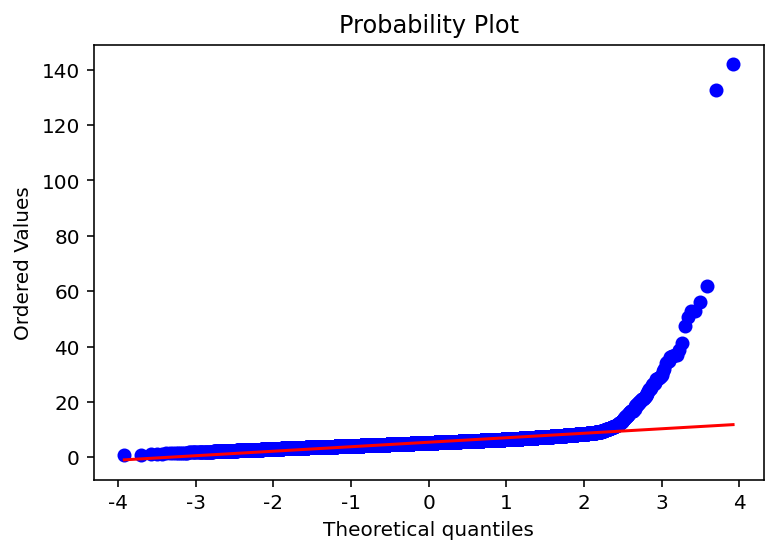

In [98]:
stats.probplot(housing['total_room_per_household'], plot=plt)

In [99]:
housing_standard = (housing[numeric_columns] - housing[numeric_columns].mean(axis=0))\
 / housing[numeric_columns].std(axis=0)

In [100]:
housing_standard.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_room_per_household,bedroom_per_rooms,room_per_population,household_per_population
count,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.533400e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.533400e+04,1.548000e+04,1.548000e+04
mean,-1.523579e-13,-4.873462e-14,-2.332329e-17,-4.929472e-17,9.563492e-17,-6.101117e-17,-2.772868e-18,-1.442545e-14,-2.092247e-16,7.002807e-15,2.437426e-14,6.185553e-15,1.259916e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.368893e+00,-1.449860e+00,-2.198048e+00,-1.211053e+00,-1.280262e+00,-1.290533e+00,-1.308698e+00,-1.781962e+00,-1.655147e+00,-1.766227e+00,-1.953528e+00,-1.742865e+00,-3.923267e+00
25%,-1.104242e+00,-8.021201e-01,-8.483227e-01,-5.428958e-01,-5.763713e-01,-5.750641e-01,-5.752389e-01,-6.909293e-01,-7.605410e-01,-3.850652e-01,-6.465063e-01,-4.008697e-01,-6.465047e-01
50%,5.238710e-01,-6.483400e-01,2.502911e-02,-2.326760e-01,-2.472481e-01,-2.337983e-01,-2.363118e-01,-1.730461e-01,-2.350325e-01,-8.025007e-02,-1.669327e-01,-3.464092e-02,-9.791232e-02
75%,7.877548e-01,9.640209e-01,6.601941e-01,2.299386e-01,2.590491e-01,2.721535e-01,2.720789e-01,4.638282e-01,4.979535e-01,2.382392e-01,4.602250e-01,2.775751e-01,5.094807e-01
max,2.629963e+00,2.930542e+00,1.851128e+00,1.695986e+01,1.363358e+01,1.362452e+01,1.287328e+01,5.883048e+00,2.542015e+00,5.292974e+01,1.363182e+01,4.687733e+01,1.044981e+01


## sklearn에서 스케일링

In [101]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [102]:
std_scaler = StandardScaler()
std_scaler.fit(housing[numeric_columns])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [103]:
std_scaler.transform(housing[numeric_columns])

array([[-1.33331666,  1.22036044,  0.66021542, ...,  0.79946578,
        -0.4002518 ,  0.32063532],
       [ 0.95209059, -0.94661077, -1.00714653, ...,  0.25408956,
        -0.04411691,  0.56070894],
       [-1.25863015,  1.03861447,  0.10442811, ...,  0.24827365,
         0.50993324,  1.92354681],
       ...,
       [ 0.31974479, -0.69962265, -0.61015559, ..., -1.22816329,
         0.11608248, -0.7663347 ],
       [-1.07938252,  0.54463824, -0.05436827, ..., -0.47350437,
        -0.49408789, -0.91986488],
       [ 0.43426411, -0.64370081, -0.92774834, ..., -0.56635498,
        -0.06636567, -0.43725297]])

In [104]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit_transform(housing[numeric_columns])

array([[0.20717131, 0.60957447, 0.70588235, ..., 0.17663818, 0.02761458,
        0.2952668 ],
       [0.66434263, 0.11489362, 0.29411765, ..., 0.14164644, 0.03493918,
        0.31196927],
       [0.22211155, 0.56808511, 0.56862745, ..., 0.14127328, 0.04633429,
        0.40678502],
       ...,
       [0.53784861, 0.1712766 , 0.39215686, ..., 0.046544  , 0.03823399,
        0.21964381],
       [0.25796813, 0.45531915, 0.52941176, ..., 0.09496348, 0.02568466,
        0.20896236],
       [0.56075697, 0.18404255, 0.31372549, ..., 0.08900611, 0.03448159,
        0.24253878]])

## Pipeline
- 데이터 준비 과정을 모두 파이프라인으로 연결함.

In [105]:
from sklearn.pipeline import Pipeline

In [106]:
from sklearn.compose import ColumnTransformer

### Numeric Pipeline
- N/A 값 대체 (imputer)
- 특성 조합
- Scaling

In [107]:
housing_sample = housing_origin.copy()
housing_sample.drop('median_house_value', axis=1, inplace=True)

In [108]:
housing_sample.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [109]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'total_room_per_household',
       'bedroom_per_rooms', 'room_per_population', 'household_per_population',
       'ocean_proximity_label'],
      dtype='object')

In [110]:
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                   'total_bedrooms', 'population', 'households', 'median_income',]
total_room_idx, total_bedroom_idx, population_idx, house_hold_idx = 3, 4, 5, 6


In [111]:
# 변환기 만들기
# fit과 transform
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, household_idx = 3, 4, 5, 6
class CombineAttrs(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
        population_per_household = X[:, population_idx]/X[:, household_idx]
        
        room_per_population =  X[:, rooms_idx] / X[:, population_idx]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room, room_per_population]
        else:
            return np.c_[X, rooms_per_household, population_per_household, room_per_population]


- 그럼 이전에 만들었던 'room_per_population'는 이번엔 안만든거죠?
- 이거 룸퍼포퓰레이션 추가해도 열개수가 11개인데 왤까요?
- 클래스에서 baseEstimator랑 transformermixin 상속받았는데 현재로선 이거 사용한건 아니죠?
- 아까 잘 못들어서 그런데 add_bedrooms_per_room을 초기화 함수에 넣어주고 뒤에서 if로 변수 만들어준 게 보통 하는 방식인건가요? 아니면 다른 의미가 있는 건가요?




In [112]:
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                   'total_bedrooms', 'population', 'households', 'median_income',]

In [113]:
CombineAttrs(add_bedrooms_per_room=False).fit_transform(housing_sample[numeric_columns].values).shape

(20640, 11)

In [114]:
housing = X_train.copy()
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_income_rank', 'median_house_value'],
      dtype='object')

In [115]:
numeric_pipeline = Pipeline([
                             ('imputer', SimpleImputer(strategy='median')),
                             ('comb_attrs', CombineAttrs(add_bedrooms_per_room=True)),
                             ('scaler', StandardScaler())
])

In [116]:
scaled_numeric = numeric_pipeline.fit_transform(
    housing.drop('ocean_proximity', axis=1)
    )
scaled_numeric.shape

(15480, 14)

In [117]:
cgr_pipeline = Pipeline([
                         ('onehot', OneHotEncoder())
])
cgr_pipeline.fit_transform(housing[['ocean_proximity']])

<15480x5 sparse matrix of type '<class 'numpy.float64'>'
	with 15480 stored elements in Compressed Sparse Row format>

In [118]:

X_train.drop('ocean_proximity',axis=1).columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_income_rank', 'median_house_value'],
      dtype='object')

In [119]:
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
cgr_columns = ['ocean_proximity']

#### 전체 파이프라인(전처리)

In [120]:
df_pipeline = ColumnTransformer([
                                 ('num_pipeline', numeric_pipeline, numeric_columns),
                                 ('cgr_pipeline', cgr_pipeline, cgr_columns)
])

In [121]:
df_pipeline.fit_transform(X_train).shape

(15480, 17)

## 원본 데이터로 파이프라인 fit_transform하기

In [122]:
housing = housing_origin.copy()
housing['median_income_rank'] = np.ceil(housing['median_income'])
housing['median_income_rank'] = housing['median_income_rank'].\
    where(housing['median_income_rank']<10, 10)

X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=housing['median_income_rank'])
X_train.drop('median_income_rank', axis=1,  inplace=True)
X_test.drop('median_income_rank', axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [123]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [124]:
X_train_ready = df_pipeline.fit_transform(X_train)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_ready, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
lin_reg.predict(X_train_ready)

array([100894.54201755, 222460.50904273, 293110.46571394, ...,
       159497.98904696, 253618.07157925, 118078.67343026])

In [128]:
from sklearn.metrics import mean_squared_error
lin_reg.predict(X_train_ready)

array([100894.54201755, 222460.50904273, 293110.46571394, ...,
       159497.98904696, 253618.07157925, 118078.67343026])

In [129]:
y_train.values

array([ 62100., 183200., 425900., ..., 149100., 194300.,  69100.])

In [130]:
err = np.sqrt(mean_squared_error(y_train.values, lin_reg.predict(X_train_ready)))
err

66858.88872563717

In [131]:
y_train.std()

115699.3274232028

In [132]:
lin_reg.score(X_train_ready, y_train)

0.6660475030089736

In [133]:
lin_reg.coef_

array([-56301.45416851, -58548.48512138,  13254.04349744,   1420.21317731,
         2420.91309562, -25000.4674409 ,  26223.88383862,  78095.87682571,
       -27031.91073467,   -759.51393806,  10701.18014536,  36560.82324809,
       -16941.39182433, -50606.83194162, 104489.51074156, -21893.39889248,
       -15047.88808312])

**Test데이터에서는 transform만 호출!**

In [134]:
X_test_ready = df_pipeline.transform(X_test)
X_test_ready

array([[ 0.73993284, -0.71114648,  1.06307822, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75490589, -0.79553592,  0.19043152, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62014842, -0.76271781,  1.69773037, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.9295915 , -0.95493822, -1.39619885, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4479293 , -0.42984831, -0.92020974, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.53530113, -0.70176987, -0.36488911, ...,  0.        ,
         0.        ,  0.        ]])

In [135]:
lin_reg.predict(X_test_ready)

array([299453.39773108, 184775.67920525, 204074.56420879, ...,
       268981.73761453, 301847.04423955, 514864.27883955])

### Category Pipeline
- OneHotEncoding

In [136]:
numeric_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

## GridSearch
- 조합을 주고 다 해보는 것

## RandomSearch
- 어느정도 범위를 주고 랜덤하게 탐색시키는 것.

In [137]:
X_train.shape

(15480, 9)

In [138]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso

In [139]:
GridSearchCV?

Object `GridSearchCV` not found.


In [140]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [141]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(Ridge(), param_grid=param_grid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [142]:
grid_search.fit(X_train_ready, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [143]:
grid_search.best_params_

{'alpha': 100}

In [144]:
np.sqrt(-grid_search.best_score_)

67510.16522136363

In [145]:
model = grid_search.best_estimator_

In [146]:
model

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [147]:
model.coef_

array([-47735.43646123, -49516.58977589,  13495.03025478,   1374.34667159,
         4571.29904168, -24076.54924112,  23383.65023976,  77767.41547388,
       -25756.23329625,   -906.57610133,  10365.66664016,  34730.59406056,
         8563.82290528, -29951.55381341,   5113.16224088,   4677.56805701,
        11597.00061023])

In [148]:
grid_search.cv_results_

{'mean_fit_time': array([0.00714505, 0.00654688, 0.00723367, 0.00712948, 0.00610137,
        0.00578847]),
 'mean_score_time': array([0.00075369, 0.00079739, 0.00077858, 0.00077245, 0.00077937,
        0.00069287]),
 'mean_test_score': array([-4.57187210e+09, -4.57185150e+09, -4.57166058e+09, -4.57066969e+09,
        -4.56952250e+09, -4.55762241e+09]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'rank_test_score': array([6, 5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([-4.47278553e+09, -4.47278596e+09, -4.47279016e+09, -4.47282019e+09,
        -4.47277718e+09, -4.47643726e+09]),
 'split1_test_score': array([-4.94063104e+09, -4.94063083e+09, -4.94062909e+09, -4.94064572e+09,
        -4.94194266e+09, -4.96030185e+09]),
 's

In [149]:
housing_origin.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [151]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': np.arange(0.1, 1, 0.1)
}

In [152]:
grid_elastic = GridSearchCV(ElasticNet(), param_grid=param_grid,cv=10, 
                            scoring='neg_mean_squared_error', n_jobs=-1)
grid_elastic

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [153]:
grid_elastic.fit(X_train_ready, y_train)
grid_elastic

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [154]:
grid_elastic

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [155]:
grid_elastic.cv_results_

{'mean_fit_time': array([0.13488731, 0.13018432, 0.130704  , 0.12847974, 0.13543675,
        0.13390541, 0.15939922, 0.22919619, 0.43620162, 0.05834634,
        0.05656362, 0.06165118, 0.06105795, 0.06668746, 0.06855936,
        0.07229419, 0.08191772, 0.09128449, 0.01527193, 0.01425743,
        0.01572456, 0.01876066, 0.01888847, 0.01824028, 0.02170732,
        0.02380857, 0.03018823, 0.00844405, 0.00912032, 0.00900943,
        0.00814948, 0.00833018, 0.00860012, 0.00924916, 0.01019874,
        0.01108406, 0.01050563, 0.00821679, 0.00706482, 0.00837908,
        0.0068574 , 0.00725162, 0.00749795, 0.00771029, 0.00730431]),
 'mean_score_time': array([0.00118544, 0.00126154, 0.00127158, 0.00122674, 0.0012234 ,
        0.00130341, 0.00119193, 0.00122459, 0.00127125, 0.001228  ,
        0.00124254, 0.00121551, 0.0012301 , 0.00117686, 0.00120878,
        0.00118325, 0.00119286, 0.00120394, 0.00108356, 0.00098257,
        0.00092978, 0.00093832, 0.00116758, 0.00108094, 0.00103745,
        0.

In [156]:
grid_elastic.best_params_

{'alpha': 0.1, 'l1_ratio': 0.9}

In [157]:
model = grid_elastic.best_estimator_
model

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [158]:
model.score(X_train_ready, y_train)

0.6648543044696293

In [159]:
# 선생님 스코어 볼 때 일정한 기준이 있나요? 
# 최대값이 몇점이라던가 음수값이 나오면 어떤 의미가 있다거나... 
# 0.94랑 0.8을 왜 큰차이라고 보는지 하는 기준? 
# 배경지식이 궁금합니다  
